In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("max_colwidth", 80)

In [305]:
df = pd.read_csv('dataset/dataset_10000.csv')

In [306]:
df

,CODIGO PERIODO,CODIGO ESTUDIANTE,DES_APELLIDO_PATERNO,DES_APELLIDO_MATERNO,DES_NOMBRES,GENERO,EDAD,CORREO_UPC,CORREO_PERSONAL_1,MOBILE PHONE,FLAG_ESTUDIANTE_PROVINCIA,CARRERA,FACULTAD,CAMPUS,FECHA MATRICULA,IND_CICLO_ALUMNO,NRO_CICLOS_ORDINARIO_MAT,NRO_CICLOS_ORDINARIO_RET,FLAG_TIENE_DEUDA,MONTO_DEUDA,FLAG_COLEGIO_PROCEDENCIA_ES_PROVINCIA,FLAG_BECA_18,FLAG_BENEFICIO,TIPO BENEFICIO,MODALIDAD DE INGRESO,CICLO DE INGRESO,FLAG_TRABAJA,FLAG_LLEVÓ NIVELACIÓN,NIVEL SOCIOECONÓMICO,CATEGORÍA DE PAGO,CANTIDAD CURSOS MATRICULADOS EN RIESGO,CANTIDAD CURSOS MATRICULADOS EN PRESENCIAL,CANTIDAD CURSOS MATRICULADOS EN VIRTUAL,TOTAL DE CURSOS MATRICULADOS EN TODO SU AVANCE,TOTAL DE CURSOS APROBADOS EN TODO SU AVANCE,TOTAL DE CURSOS DESAPROBADOS EN TODO SU AVANCE,TOTAL DE RETIROS DE ASIGNATURA EN TODO SU AVANCE,TOTAL DE CURSOS MATRICULADOS POR CICLO,TOTAL DE RETIROS DE ASIGNATURA POR CICLO,TOTAL DE CURSOS APROBADOS POR CICLO,TOTAL DE CURSOS DESAPROBADOS POR CICLO,TOTAL DE CRÉDITOS APROBADOS POR CICLO,TOTAL DE CRÉDITOS DESAPROBADOS POR CICLO,TOTAL DE CRÉDITOS APROBADOS EN TODO SU AVANCE,TOTAL DE CRÉDITOS DESAPROBADOS EN TODO SU AVANCE,TOTAL DE CRÉDITOS MATRICULADOS POR CICLO,TOTAL DE CRÉDITOS MATRICULADOS EN TODO SU AVANCE,PROMEDIO PONDERADO ACUMULADO,PROMEDIO POR CICLO,NÚMERO DE DOBLE DESAPROBACIÓN POR CICLO,NÚMERO DE DOBLE DESAPROBACIÓN EN TODO SU AVANCE,NÚMERO DE ASISTENCIAS POR CICLO,PORCENTAJE DE ASISTENCIAS POR CICLO,NÚMERO DE INASISTENCIAS POR CICLO,PORCENTAJE DE INASISTENCIAS,FLAG ABANDONO ESTUDIOS
0,201901,u201610000,Apellido 0,Apellido 0,Nombre0,F,26,u0@upc.edu.pe,personal_0@gmail.com,90000000,SI,Ingeniería Electrónica,Ingeniería,Monterrico,2019-00-01,7,7,0,SI,4000,NO,NO,SI,SIN BENEFICIO,SELECCIÓN PREFERENTE,20151,NO,SI,B,U,6,5,5,35,8,2,25,7,2,2,5,32,20,32,8,28,140,17.246804,7.240806,3,0,82,0.828283,17,0.171717,NO
1,201901,u201911000,Apellido 1,Apellido 1,Nombre1,M,20,u1@upc.edu.pe,personal_1@gmail.com,91000000,NO,Ciencias de la Computación,Ingeniería,Monterrico,2019-01-01,1,0,1,NO,0,NO,SI,NO,DESCUENTOS CORPORATIVOS,SELECCIÓN PREFERENTE,20181,NO,SI,A,U,2,3,1,5,2,2,1,7,5,1,6,8,24,8,8,28,20,9.767480,9.104377,4,1,118,0.830986,24,0.169014,NO
2,201901,u201812000,Apellido 2,Apellido 2,Nombre2,M,23,u2@upc.edu.pe,personal_2@gmail.com,92000000,NO,Ingeniería de Software,Ingeniería,Monterrico,2019-02-01,3,1,2,NO,0,NO,NO,NO,SIN BENEFICIO,SELECCIÓN PREFERENTE,20171,NO,NO,C,S,4,6,4,15,12,1,2,5,1,1,4,48,16,48,4,20,60,7.753204,16.886240,5,0,119,0.757962,38,0.242038,NO
3,201901,u201623000,Apellido 3,Apellido 3,Nombre3,M,30,u3@upc.edu.pe,personal_3@gmail.com,93000000,SI,Ingeniería de Software,Ingeniería,Monterrico,2019-03-01,6,4,2,NO,0,NO,NO,NO,DESCUENTOS CORPORATIVOS,EXONER.GRADO TITULO,20162,SI,NO,D,Q,2,2,5,30,1,0,29,6,6,2,4,4,16,4,0,24,120,14.138699,7.934101,6,0,89,0.773913,26,0.226087,NO
4,201901,u201724000,Apellido 4,Apellido 4,Nombre4,F,26,u4@upc.edu.pe,personal_4@gmail.com,94000000,NO,Ingeniería de Gestión Minera,Ingeniería,Monterrico,2019-04-01,4,4,0,NO,0,NO,NO,SI,BECA DE HONOR,TRASLADO EXTERNO,20172,NO,SI,E,X,6,5,2,20,4,8,8,3,1,3,0,16,0,16,32,12,80,17.861734,7.734923,4,0,65,0.747126,22,0.252874,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,201901,u201819995,Apellido 9995,Apellido 9995,Nombre9995,F,22,u9995@upc.edu.pe,personal_9995@gmail.com,99995000000,NO,Ingeniería de Gestión Empresarial,Ingeniería,Monterrico,2019-09995-01,3,1,2,NO,0,NO,NO,NO,SIN BENEFICIO,SELECCIÓN PREFERENTE,20171,NO,SI,A,U,3,6,1,15,1,1,13,3,3,3,0,4,0,4,4,12,60,6.869729,14.106822,6,0,122,0.859155,20,0.140845,SI
9996,201901,u201619996,Apellido 9996,Apellido 9996,Nombre9996,F,18,u9996@upc.edu.pe,personal_9996@gmail.com,99996000000,NO,Ingeniería de Software,Ingeniería,Monterrico,2019-09996-01,7,7,0,SI,4000,NO,NO,NO,SIN BENEFICIO,EVALUACION INTEGRAL,20151,NO,SI,C,Q,2,1,5,35,27,4,4,4,6,1,3,10

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   CODIGO PERIODO                                    10000 non-null  int64  
 1   CODIGO ESTUDIANTE                                 10000 non-null  object 
 2   DES_APELLIDO_PATERNO                              10000 non-null  object 
 3   DES_APELLIDO_MATERNO                              10000 non-null  object 
 4   DES_NOMBRES                                       10000 non-null  object 
 5   GENERO                                            10000 non-null  object 
 6   EDAD                                              10000 non-null  int64  
 7   CORREO_UPC                                        10000 non-null  object 
 8   CORREO_PERSONAL_1                                 10000 non-null  object 
 9   MOBILE PHONE      

# Preprocessing

In [308]:
#df.isnull().sum()

In [309]:
def map_si_no_to_binary(column):
    return column.apply(lambda x: 1 if x == "SI" else 0)

In [310]:
columns_to_convert = ["FLAG_ESTUDIANTE_PROVINCIA", "FLAG_TIENE_DEUDA", "FLAG_COLEGIO_PROCEDENCIA_ES_PROVINCIA", "FLAG_BECA_18", "FLAG_BENEFICIO", "FLAG_TRABAJA", "FLAG_LLEVÓ NIVELACIÓN", "FLAG ABANDONO ESTUDIOS"]
for column in columns_to_convert:
    df[column] = map_si_no_to_binary(df[column])

In [311]:
X = df.drop(["FLAG ABANDONO ESTUDIOS"], axis=1)
Y = df["FLAG ABANDONO ESTUDIOS"]

In [312]:
columns_drop = [
    "CODIGO PERIODO",
    "CODIGO ESTUDIANTE",
    "DES_APELLIDO_PATERNO",
    "DES_APELLIDO_MATERNO",
    "DES_NOMBRES",
    "CORREO_UPC",
    "CORREO_PERSONAL_1",
    "MOBILE PHONE",
    "FACULTAD",
    "CAMPUS",
    "FECHA MATRICULA",
    "CICLO DE INGRESO"
]

In [313]:
X.drop(columns_drop, axis=1, inplace=True)

In [314]:
categorical_columns = X.columns[X.dtypes == "object"]
numerical_columns = X.columns[X.dtypes != "object"]

In [315]:
X[categorical_columns]

,GENERO,CARRERA,TIPO BENEFICIO,MODALIDAD DE INGRESO,NIVEL SOCIOECONÓMICO,CATEGORÍA DE PAGO
0,F,Ingeniería Electrónica,SIN BENEFICIO,SELECCIÓN PREFERENTE,B,U
1,M,Ciencias de la Computación,DESCUENTOS CORPORATIVOS,SELECCIÓN PREFERENTE,A,U
2,M,Ingeniería de Software,SIN BENEFICIO,SELECCIÓN PREFERENTE,C,S
3,M,Ingeniería de Software,DESCUENTOS CORPORATIVOS,EXONER.GRADO TITULO,D,Q
4,F,Ingeniería de Gestión Minera,BECA DE HONOR,TRASLADO EXTERNO,E,X
...,...,...,...,...,...,...
9995,F,Ingeniería de Gestión Empresarial,SIN BENEFICIO,SELECCIÓN PREFERENTE,A,U
9996,F,Ingeniería de Software,SIN BENEFICIO,EVALUACION INTEGRAL,C,Q
9997,F,Ingeniería Electrónica,DESCUENTO RETENCION,SELECCIÓN PREFERENTE,C,S
9998,M,Ingeniería Industrial,BECA DE HONOR,EVALUACION INTEGRAL,A,U


In [316]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

X[categorical_columns] = X[categorical_columns].apply(label_encoder.fit_transform)
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [317]:
X[categorical_columns]

,GENERO,CARRERA,TIPO BENEFICIO,MODALIDAD DE INGRESO,NIVEL SOCIOECONÓMICO,CATEGORÍA DE PAGO
0,0,3,3,7,1,4
1,1,0,2,7,0,4
2,1,9,3,7,2,2
3,1,9,2,6,3,0
4,0,7,0,9,4,5
...,...,...,...,...,...,...
9995,0,6,3,7,0,4
9996,0,9,3,4,2,0
9997,0,3,1,7,2,2
9998,1,4,0,4,0,4


In [318]:
X[numerical_columns]

,EDAD,FLAG_ESTUDIANTE_PROVINCIA,IND_CICLO_ALUMNO,NRO_CICLOS_ORDINARIO_MAT,NRO_CICLOS_ORDINARIO_RET,FLAG_TIENE_DEUDA,MONTO_DEUDA,FLAG_COLEGIO_PROCEDENCIA_ES_PROVINCIA,FLAG_BECA_18,FLAG_BENEFICIO,FLAG_TRABAJA,FLAG_LLEVÓ NIVELACIÓN,CANTIDAD CURSOS MATRICULADOS EN RIESGO,CANTIDAD CURSOS MATRICULADOS EN PRESENCIAL,CANTIDAD CURSOS MATRICULADOS EN VIRTUAL,TOTAL DE CURSOS MATRICULADOS EN TODO SU AVANCE,TOTAL DE CURSOS APROBADOS EN TODO SU AVANCE,TOTAL DE CURSOS DESAPROBADOS EN TODO SU AVANCE,TOTAL DE RETIROS DE ASIGNATURA EN TODO SU AVANCE,TOTAL DE CURSOS MATRICULADOS POR CICLO,TOTAL DE RETIROS DE ASIGNATURA POR CICLO,TOTAL DE CURSOS APROBADOS POR CICLO,TOTAL DE CURSOS DESAPROBADOS POR CICLO,TOTAL DE CRÉDITOS APROBADOS POR CICLO,TOTAL DE CRÉDITOS DESAPROBADOS POR CICLO,TOTAL DE CRÉDITOS APROBADOS EN TODO SU AVANCE,TOTAL DE CRÉDITOS DESAPROBADOS EN TODO SU AVANCE,TOTAL DE CRÉDITOS MATRICULADOS POR CICLO,TOTAL DE CRÉDITOS MATRICULADOS EN TODO SU AVANCE,PROMEDIO PONDERADO ACUMULADO,PROMEDIO POR CICLO,NÚMERO DE DOBLE DESAPROBACIÓN POR CICLO,NÚMERO DE DOBLE DESAPROBACIÓN EN TODO SU AVANCE,NÚMERO DE ASISTENCIAS POR CICLO,PORCENTAJE DE ASISTENCIAS POR CICLO,NÚMERO DE INASISTENCIAS POR CICLO,PORCENTAJE DE INASISTENCIAS
0,0.525056,1.723319,1.126323,1.484911,-1.165579,1.221943,0.599024,-0.572423,-0.327937,0.986097,-0.587050,0.586280,1.465667,0.887851,0.886016,1.126323,-0.263241,-0.518196,3.102117,1.397909,-0.875716,-0.610731,1.823942,-0.263241,1.823942,-0.263241,-0.518196,1.397909,1.126323,1.119329,-1.666497,-0.292418,-0.639797,-0.493603,0.852513,-1.412248,-0.852513
1,-1.076946,-0.580276,-1.309145,-1.324608,0.094643,-0.818369,-0.619124,-0.572423,3.049371,-1.014099,-0.587050,0.586280,-0.881841,-0.288111,-1.458717,-1.309145,-0.896997,-0.518196,-0.658918,1.397909,0.873267,-1.212792,2.433181,-0.896997,2.433181,-0.896997,-0.518196,1.397909,-1.309145,-0.620948,-1.102450,0.292067,-0.405044,0.880315,0.889950,-0.480185,-0.889950
2,-0.275945,-0.580276,-0.497323,-0.923248,1.354864,-0.818369,-0.619124,-0.572423,-0.327937,-1.014099,-0.587050,-1.705668,0.291913,1.475832,0.299833,-0.497323,0.159263,-0.669313,-0.502208,-0.014548,-1.458710,-1.212792,1.214702,0.159263,1.214702,0.159263,-0.669313,-0.014548,-0.497323,-1.089627,1.252886,0.876553,-0.639797,0.918480,-0.121413,1.383940,0.121413
3,1.593057,1.723319,0.720412,0.280831,1.354864,-0.818369,-0.619124,-0.572423,-0.327937,-1.014099,1.703431,-1.705668,-0.881841,-0.876092,0.886016,0.720412,-1.002622,-0.820430,3.728956,0.691681,1.456261,-0.610731,1.214702,-1.002622,1.214702,-1.002622,-0.820430,0.691681,0.720412,0.396140,-1.456657,1.461039,-0.639797,-0.226452,0.099507,-0.213882,-0.099507
4,0.525056,-0.580276,-0.091411,0.280831,-1.165579,-0.818369,-0.619124,-0.572423,-0.327937,0.986097,-0.587050,0.586280,1.465667,0.887851,-0.872534,-0.091411,-0.685745,0.388507,0.438051,-1.427006,-1.458710,-0.008670,-1.222257,-0.685745,-1.222257,-0.685745,0.388507,-1.427006,-0.091411,1.262410,-1.516943,0.292067,-0.639797,-1.142398,-0.271479,-0.746489,0.271479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.542945,-0.580276,-0.497323,-0.923248,1.354864,-0.818369,-0.619124,-0.572423,-0.327937,-1.014099,-0.587050,0.586280,-0.294964,1.475832,-1.458717,-0.497323,-1.002622,-0.669313,1.221600,-1.427006,-0.292721,-0.008670,-1.222257,-1.002622,-1.222257,-1.002622,-0.669313,-1.427006,-0.497323,-1.295193,0.411640,1.461039,-0.639797,1.032973,1.280083,-1.012792,-1.280083
9996,-1.610946,-0.580276,1.126323,1.484911,-1.165579,1.221943,0.599024,-0.572423,-0.327937,-1.014099,-0.587050,0.586280,-0.881841,-1.464073,0.886016,1.126323,1.743652,-0.215961,-0.188788,-0.720777,1.456261,-1.212792,0.605462,1.743652,0.605462,1.743652,-0.215961,-0.720777,1.126323,-0.462845,0.795637,-0.876904,0.299217,1.643603,0.557995,0.718181,-0.557995
9997,-1.076946,-0.580276,-0.091411,-0.521888,1.354864,-0.818369,-0.619124,-0.572423,-0.327937,0.986097,1.703431,0.586

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [320]:
X_train.shape, X_test.shape

((8000, 43), (2000, 43))

# Random Forest

In [321]:
def grid():
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(df.drop('target', axis=1), df['target'])

    return grid_search
#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)
#rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
#rfc_params = {'max_features': range(1,11)}

#tree_grid = GridSearchCV(rfc, rfc_params, n_jobs = - 1, cv = skf, scoring='recall')
#tree_grid.fit(X_train, y_train)
#tree_grid.best_params_, tree_grid.best_score_

In [322]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print ("Accuracy Score: ", accuracy_score(y_test, y_pred) )

Accuracy Score:  0.817


In [323]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1636
           1       0.00      0.00      0.00       364

    accuracy                           0.82      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.67      0.82      0.74      2000



In [324]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

PROMEDIO PONDERADO ACUMULADO                        0.055647
PROMEDIO POR CICLO                                  0.055297
PORCENTAJE DE INASISTENCIAS                         0.049357
PORCENTAJE DE ASISTENCIAS POR CICLO                 0.049152
NÚMERO DE ASISTENCIAS POR CICLO                     0.045131
NÚMERO DE INASISTENCIAS POR CICLO                   0.037864
EDAD                                                0.032357
TOTAL DE RETIROS DE ASIGNATURA EN TODO SU AVANCE    0.031471
CARRERA                                             0.029548
TOTAL DE CRÉDITOS APROBADOS POR CICLO               0.029264
TOTAL DE CURSOS APROBADOS EN TODO SU AVANCE         0.028622
TOTAL DE CRÉDITOS APROBADOS EN TODO SU AVANCE       0.028371
CATEGORÍA DE PAGO                                   0.027431
TOTAL DE CURSOS DESAPROBADOS EN TODO SU AVANCE      0.025385
TOTAL DE CRÉDITOS DESAPROBADOS EN TODO SU AVANCE    0.025054
TOTAL DE CRÉDITOS MATRICULADOS EN TODO SU AVANCE    0.024536
NÚMERO DE DOBLE DESAPROB

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17688\538590419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")


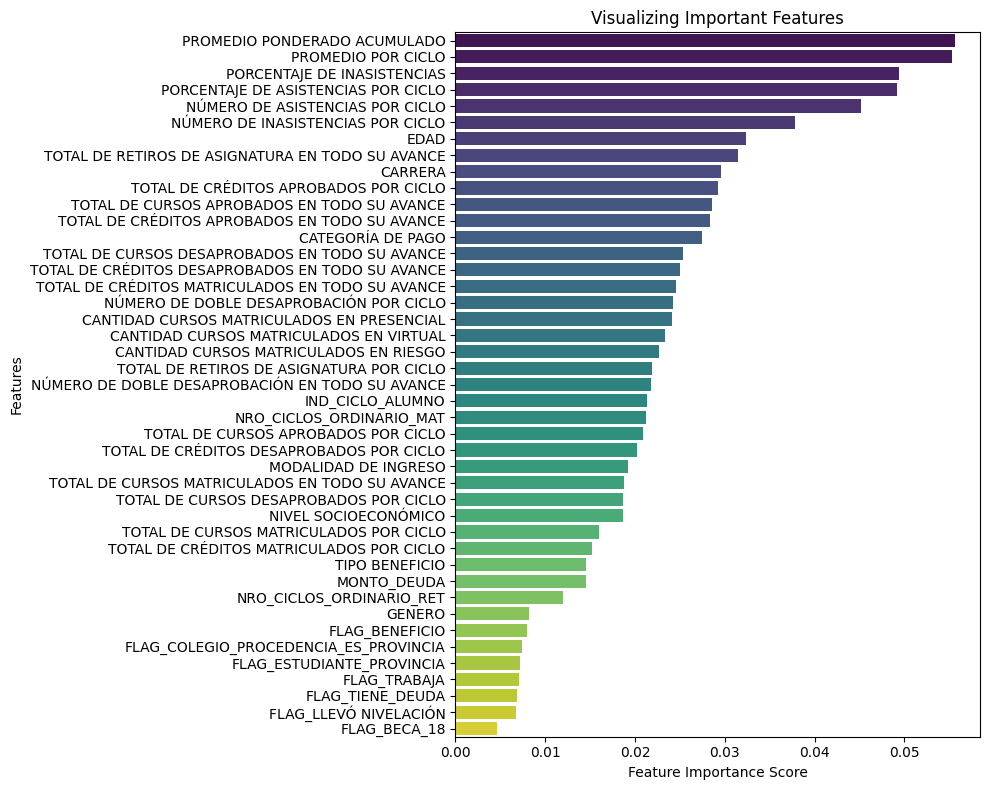

In [325]:
# Create a plot of feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()
plt.show()

In [326]:
X = df.drop(['FLAG ABANDONO ESTUDIOS', 'FLAG_BECA_18', 'FLAG_TIENE_DEUDA', 'FLAG_TRABAJA', 'FLAG_ESTUDIANTE_PROVINCIA', 'FLAG_LLEVÓ NIVELACIÓN'], axis=1)
y = df['FLAG ABANDONO ESTUDIOS']
X.drop(columns_drop, axis=1, inplace=True)

In [327]:
categorical_columns = X.columns[X.dtypes == "object"]
numerical_columns = X.columns[X.dtypes != "object"]

In [328]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

X[categorical_columns] = X[categorical_columns].apply(label_encoder.fit_transform)
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [330]:
X_train

,GENERO,EDAD,CARRERA,IND_CICLO_ALUMNO,NRO_CICLOS_ORDINARIO_MAT,NRO_CICLOS_ORDINARIO_RET,MONTO_DEUDA,FLAG_COLEGIO_PROCEDENCIA_ES_PROVINCIA,FLAG_BENEFICIO,TIPO BENEFICIO,MODALIDAD DE INGRESO,NIVEL SOCIOECONÓMICO,CATEGORÍA DE PAGO,CANTIDAD CURSOS MATRICULADOS EN RIESGO,CANTIDAD CURSOS MATRICULADOS EN PRESENCIAL,CANTIDAD CURSOS MATRICULADOS EN VIRTUAL,TOTAL DE CURSOS MATRICULADOS EN TODO SU AVANCE,TOTAL DE CURSOS APROBADOS EN TODO SU AVANCE,TOTAL DE CURSOS DESAPROBADOS EN TODO SU AVANCE,TOTAL DE RETIROS DE ASIGNATURA EN TODO SU AVANCE,TOTAL DE CURSOS MATRICULADOS POR CICLO,TOTAL DE RETIROS DE ASIGNATURA POR CICLO,TOTAL DE CURSOS APROBADOS POR CICLO,TOTAL DE CURSOS DESAPROBADOS POR CICLO,TOTAL DE CRÉDITOS APROBADOS POR CICLO,TOTAL DE CRÉDITOS DESAPROBADOS POR CICLO,TOTAL DE CRÉDITOS APROBADOS EN TODO SU AVANCE,TOTAL DE CRÉDITOS DESAPROBADOS EN TODO SU AVANCE,TOTAL DE CRÉDITOS MATRICULADOS POR CICLO,TOTAL DE CRÉDITOS MATRICULADOS EN TODO SU AVANCE,PROMEDIO PONDERADO ACUMULADO,PROMEDIO POR CICLO,NÚMERO DE DOBLE DESAPROBACIÓN POR CICLO,NÚMERO DE DOBLE DESAPROBACIÓN EN TODO SU AVANCE,NÚMERO DE ASISTENCIAS POR CICLO,PORCENTAJE DE ASISTENCIAS POR CICLO,NÚMERO DE INASISTENCIAS POR CICLO,PORCENTAJE DE INASISTENCIAS
7389,1,-1.343946,5,-0.903234,-1.324608,1.354864,-0.619124,-0.572423,0.986097,0,4,2,7,0.291913,0.299870,0.886016,-0.903234,-0.685745,-0.367079,-0.345498,0.691681,-0.292721,-1.212792,1.823942,-0.685745,1.823942,-0.685745,-0.367079,0.691681,-0.903234,1.252475,-1.114753,1.461039,-0.170290,1.300124,0.688711,0.185574,-0.688711
9275,0,-1.343946,6,0.720412,1.083551,-1.165579,-0.619124,-0.572423,-1.014099,2,6,3,3,-0.881841,0.887851,1.472200,0.720412,-0.051989,-0.518196,2.005149,-1.427006,1.456261,-0.008670,-1.222257,-0.051989,-1.222257,-0.051989,-0.518196,-1.427006,0.720412,0.246031,-0.224670,-1.461389,-0.170290,0.460507,-0.537882,1.650243,0.537882
2995,1,-1.610946,3,-0.903234,-0.923248,0.094643,1.208098,1.746958,-1.014099,3,7,1,7,-0.294964,0.299870,1.472200,-0.903234,-0.368867,-0.820430,-0.345498,1.397909,1.456261,-0.008670,1.214702,-0.368867,1.214702,-0.368867,-0.820430,1.397909,-0.903234,1.712015,-0.471153,1.461039,-0.639797,-0.302781,1.194024,-1.678551,-1.194024
5316,1,-1.076946,5,0.720412,1.083551,-1.165579,-0.619124,-0.572423,0.986097,0,4,2,7,1.465667,-1.464073,0.299833,0.720412,1.743652,-0.518196,-0.658918,0.691681,0.290273,1.195452,-0.613017,1.743652,-0.613017,1.743652,-0.518196,0.691681,0.720412,1.125727,-0.871493,0.292067,-0.405044,0.117027,0.691633,-0.746489,-0.691633
356,0,-1.343946,5,-0.497323,-0.120528,-1.165579,-0.619124,-0.572423,-1.014099,0,7,0,0,-0.881841,-0.288111,-0.872534,-0.497323,-1.108248,0.992975,-0.345498,1.397909,-0.292721,-1.212792,2.433181,-1.108248,2.433181,-1.108248,0.992975,1.397909,-0.497323,-1.079873,0.715708,0.876553,-0.639797,0.002534,-0.339882,0.718181,0.339882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,1.059057,3,0.720412,1.083551,-1.165579,-0.619124,-0.572423,-1.014099,0,4,0,2,-1.468718,1.475832,-0.872534,0.720412,-1.002622,1.446327,1.378310,-0.720777,1.456261,-0.610731,-0.003777,-1.002622,-0.003777,-1.002622,1.446327,-0.720777,0.720412,0.008826,1.611126,0.292067,0.533970,-0.837083,-1.257586,0.984484,1.257586
4859,0,-0.008945,1,0.314500,0.280831,0.094643,-0.010050,-0.572423,-1.014099,0,6,2,0,-0.881841,-1.464073,0.299833,0.314500,-0.896997,2.201912,-0.345498,-1.427006,1.456261,-1.212792,-0.003777,-0.896997,-0.003777,-0.896997,2.201912,-1.427006,0.314500,-0.105236,-0.074591,-0.876904,-0.170290,-0.608096,0.898163,-1.545399,-0.898163
3264,1,1.059057,7,-0.903234,-0.923248,0.094643,2.426246,-0.572423,0.986097,3,7,3,5,-0.881841,-1.464073,0.299833,-0.903234,-0.791371,0.237390,-0.815627,-1.427006,-1.458710,-0.610731,-0.613017,-0.791371,-0.613017,-0.791371,0.237390,-1.427006,-0.903234,1.266971,-0.698699,1.461039,0.533970,0.002534,0.165647,-0.080730,-0.165647
9845,1,1.059057,6,1.126323,1.0835

In [331]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print ("Accuracy Score: ", accuracy_score(y_test, y_pred) )

Accuracy Score:  0.816


In [332]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1636
           1       0.00      0.00      0.00       364

    accuracy                           0.82      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.67      0.82      0.74      2000



In [333]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

PROMEDIO PONDERADO ACUMULADO                        0.057119
PROMEDIO POR CICLO                                  0.056364
PORCENTAJE DE ASISTENCIAS POR CICLO                 0.051563
PORCENTAJE DE INASISTENCIAS                         0.051204
NÚMERO DE ASISTENCIAS POR CICLO                     0.047666
NÚMERO DE INASISTENCIAS POR CICLO                   0.037824
EDAD                                                0.034710
TOTAL DE RETIROS DE ASIGNATURA EN TODO SU AVANCE    0.031210
CARRERA                                             0.030254
CATEGORÍA DE PAGO                                   0.028844
TOTAL DE CRÉDITOS APROBADOS POR CICLO               0.027977
TOTAL DE CURSOS APROBADOS EN TODO SU AVANCE         0.027824
TOTAL DE CRÉDITOS APROBADOS EN TODO SU AVANCE       0.027589
TOTAL DE CRÉDITOS DESAPROBADOS EN TODO SU AVANCE    0.025711
CANTIDAD CURSOS MATRICULADOS EN PRESENCIAL          0.025180
TOTAL DE CURSOS DESAPROBADOS EN TODO SU AVANCE      0.024685
CANTIDAD CURSOS MATRICUL

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17688\538590419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")


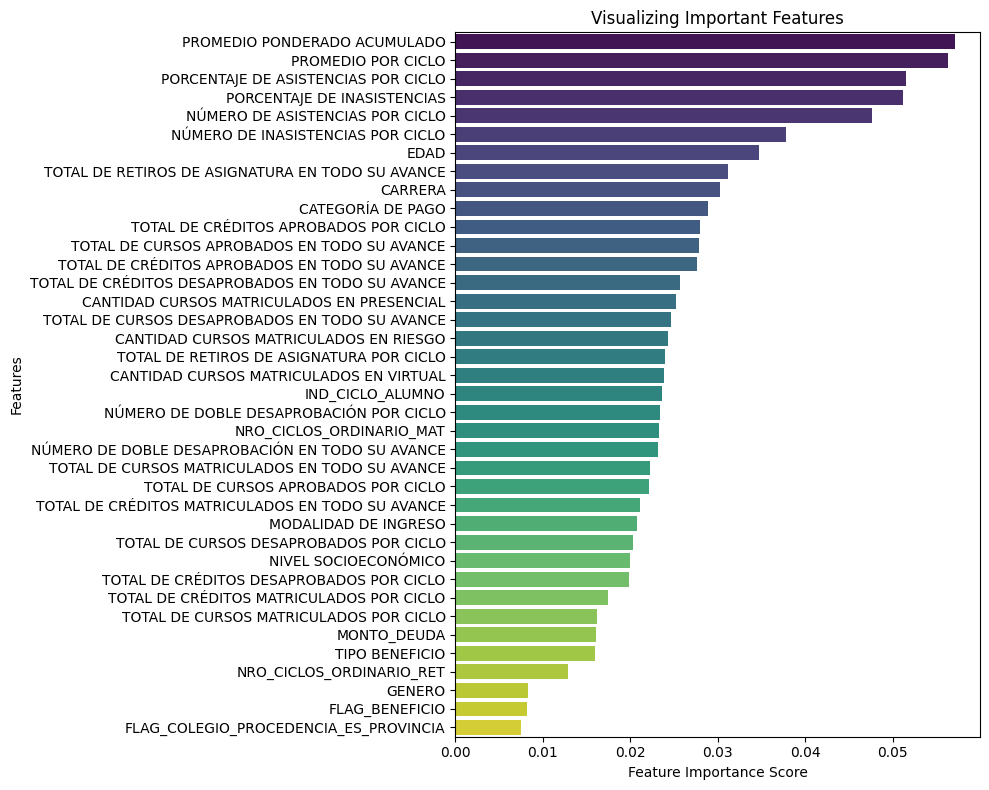

In [334]:
# Create a plot of feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()
plt.show()

# KNN

In [335]:
# Import libraries
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [336]:
knn_model = KNeighborsClassifier()

# Use with Balance data
kf = KFold(n_splits = 10, shuffle=True, random_state = 0)
# Use with Imbalance data
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0)

param_grid = {
    'n_neighbors' : range(1, 30),
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# grid  = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv = skf, scoring = 'accuracy', return_train_score = True, verbose = 1)
# grid .fit(X_train, y_train)

In [337]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [338]:
knn_model.score(X_test, y_test)

0.787

In [339]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X_train)
 
print(label)
pedro = pd.DataFrame(label, columns=['label'])

[1 1 0 ... 1 1 0]


In [340]:
print(classification_report(y_train, label))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62      6586
           1       0.18      0.51      0.26      1414

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.44      8000
weighted avg       0.71      0.50      0.56      8000

